In [44]:
import matplotlib.pyplot as plt
import numpy as np
import math

In [78]:
# define x, y, z
x = np.linspace(-60, 60, 121)
y = np.linspace(-60, 60, 121)
X, Y = np.meshgrid(x, y)
r = 60
z = np.sqrt(r ** 2 - (X ** 2 + Y ** 2))
for i in range(121):
    for j in range(121):
        if math.isnan(z[i,j]):
            z[i,j]=0

<ipython-input-78-07355ac5f299>:6: RuntimeWarning: invalid value encountered in sqrt
  z = np.sqrt(r ** 2 - (X ** 2 + Y ** 2))


In [79]:
# normal vector is calculated by cross-product between partial Z_x, Z_y
one = np.ones(len(x))
zero = np.zeros(len(x))
partial_x = np.array(-x/z) # (1, 0, partial_x)
partial_y = np.array(-y/z) # (0, 1, partial_y)
n = np.zeros((len(partial_y), len(partial_x), 3), dtype=np.float64)

<ipython-input-79-3439f213f152>:4: RuntimeWarning: divide by zero encountered in true_divide
  partial_x = np.array(-x/z) # (1, 0, partial_x)
<ipython-input-79-3439f213f152>:4: RuntimeWarning: invalid value encountered in true_divide
  partial_x = np.array(-x/z) # (1, 0, partial_x)
<ipython-input-79-3439f213f152>:5: RuntimeWarning: divide by zero encountered in true_divide
  partial_y = np.array(-y/z) # (0, 1, partial_y)
<ipython-input-79-3439f213f152>:5: RuntimeWarning: invalid value encountered in true_divide
  partial_y = np.array(-y/z) # (0, 1, partial_y)


In [80]:
# Normal vector
for i in range(len(partial_y)):
    for j in range(len(partial_x)):
        n1 = 0 * partial_y[i][j] - partial_x[i][j] * 1
        n2 = partial_x[i][j] * 0 - 1 * partial_y[i][j]
        n3 = 1 * 1 - 0 * 0
        n[i][j][0] = n1
        n[i][j][1] = n2
        n[i][j][2] = n3
n = np.array(n)

<ipython-input-80-4125e556ba91>:4: RuntimeWarning: invalid value encountered in double_scalars
  n1 = 0 * partial_y[i][j] - partial_x[i][j] * 1
<ipython-input-80-4125e556ba91>:5: RuntimeWarning: invalid value encountered in double_scalars
  n2 = partial_x[i][j] * 0 - 1 * partial_y[i][j]


In [81]:
# Normal vector normalizeation
n_normalized = np.zeros((121, 121, 3))
for i in range(len(partial_y)):
    for j in range(len(partial_x)):
        n_normalized[i,j,0] = n[i][j][0] / (np.sqrt(n[i][j][0] ** 2 + n[i][j][1] ** 2 + n[i][j][2] ** 2 + 0.0000001))
        n_normalized[i, j, 1] = n[i][j][1] / (np.sqrt(n[i][j][0] ** 2 + n[i][j][1] ** 2 + n[i][j][2] ** 2) + 0.000001)
        n_normalized[i,j,2] = n[i][j][2] / (np.sqrt(n[i][j][0] ** 2 + n[i][j][1] ** 2 + n[i][j][2] ** 2) + 0.0000001)

In [82]:
# light source
light_source = [0.15, 0, 0.94]

In [83]:
# calculate intensity
intensity = np.zeros((121,121), dtype=np.float64)
for i in range(len(partial_y)):
    for j in range(len(partial_x)):
        intensity[i, j] = np.dot(n_normalized[i,j], light_source)

In [84]:
# mapping intensity on sphere surface
new_sphere = np.zeros((121,121,121), dtype=np.float64)
for i in range(len(partial_y)):
    for j in range(len(partial_x)):
        new_sphere[i,j,int(z[i,j])] = intensity[i, j]

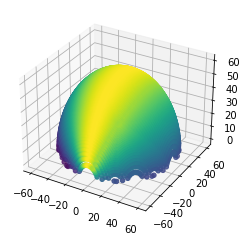

In [85]:
# surface rendering
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X,Y,z,c=intensity)
#plt.imshow(intensity)
plt.show()